# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from scipy.stats import linregress
from datetime import datetime
import time

from citipy import citipy

from api_keys import weather_api_key
from api_keys import g_key

# Define output file path
output_data_file = "output_data/cities.csv"

# Lat and long co-ordinates
lat_range = (-90, 90)
lng_range = (-180, 180)

# URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

## Generate Cities List

In [6]:
# Create a list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# See what nearest city is for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add cities
    if city not in cities:
        cities.append(city)

# See if we have enough cities
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Create list for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City found: {city}")
    except:
        print(f"City not found: {city}")

City found: solotvyn
City found: richards bay
City found: yulara
City found: potsdam
City found: san policarpo
City found: mataura
City found: meulaboh
City not found: meyungs
City found: bengkulu
City found: viedma
City found: ushuaia
City found: port-gentil
City found: labuhan
City not found: karaul
City found: winslow
City found: rikitea
City not found: vaitupu
City found: paamiut
City found: petropavlovsk-kamchatskiy
City found: castro
City found: lompoc
City found: butaritari
City found: reidsville
City found: pisco
City found: khandyga
City found: biak
City found: cheremisinovo
City found: hermanus
City found: yellowknife
City found: punta arenas
City found: cayenne
City found: barrow
City found: bluff
City found: chuy
City found: keighley
City found: katsuura
City found: halifax
City found: sain alto
City found: limerick
City found: roma
City found: saint-denis
City found: porto novo
City found: abalak
City found: souillac
City not found: teneguiban
City found: bredasdorp
City f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create datafrane using above data
weather_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [9]:
# Display data
weather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,solotvyn,UA,53.26,92,6,3.74,48.7021,24.4221,1655525591
1,richards bay,ZA,53.29,58,0,6.96,-28.7830,32.0377,1655525591
2,yulara,AU,70.45,30,67,11.59,-25.2406,130.9889,1655525328
3,potsdam,DE,70.29,80,97,7.61,52.3989,13.0657,1655525592
4,san policarpo,PH,85.80,71,30,9.71,12.1791,125.5072,1655525593
...,...,...,...,...,...,...,...,...,...
552,balykshi,KZ,69.80,78,0,8.95,47.0667,51.8667,1655525801
553,morant bay,JM,80.22,84,100,6.64,17.8815,-76.4093,1655525801
554,kangaatsiaq,GL,33.85,96,90,2.89,68.3065,-53.4641,1655525802
555,constitucion,CL,50.27,83,97,7.23,-35.3333,-72.4167,1655525802


In [12]:
# Export to .csv file
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Check to see if there are any cities that have humidity > 100%
overhumiditydf = weather_df[(weather_df['Humidity'] > 100)]
overhumiditydf

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

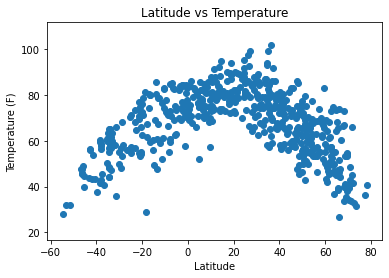

In [15]:
x = weather_df["Latitude"]
t = weather_df["Temperature"]

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(min(t)-10, max(t)+10)

plt.scatter(x,t)

plt.savefig("../output_data/lat_temp.png")

The plot shows that cities towards the equator (Latitude 0) are increasing in temperature while those further away are not as hot.

## Latitude vs. Humidity Plot

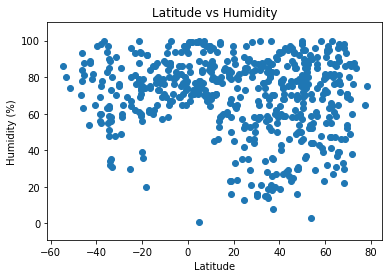

In [16]:
x = weather_df["Latitude"]
h = weather_df["Humidity"]

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(min(h)-10, max(h)+10)

plt.scatter(x,h)

plt.savefig("../output_data/lat_hum.png")

There seems to be no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

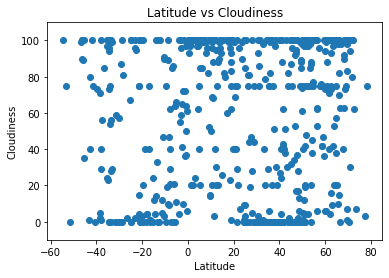

In [17]:
x = weather_df["Latitude"]
c = weather_df["Cloudiness"]

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(min(c)-10, max(c)+10)

plt.scatter(x,c)

plt.savefig("../output_data/lat_cloud.png")

The plot shows that there is no real correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

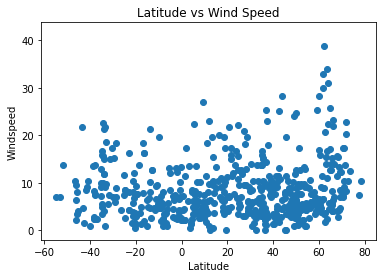

In [18]:
x = weather_df["Latitude"]
w = weather_df["Windspeed"]

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.ylim(min(w)-2, max(w)+5)

plt.scatter(x,w)

plt.savefig("../output_data/lat_wind.png")

The plot shows that there is no real correlation between latitude and wind speed.

## Linear Regression

In [19]:
# Create seperate dataframes for north and south hemispheres
north_hem_df = weather_df.loc[weather_df["Latitude"] > 0]
south_hem_df = weather_df.loc[weather_df["Latitude"] < 0]

# Check to see if we have seperated the two dataframes by seeing if the numbers add up
#north_hem_df.count()
#south_hem_df.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.51x + 88.51
The r value is: -0.7


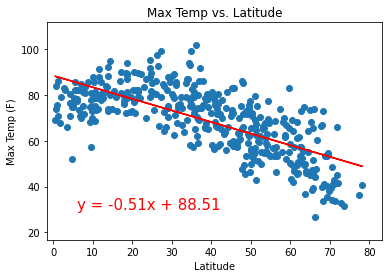

In [23]:
nlat = north_hem_df["Latitude"]
nmaxtemp = north_hem_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nmaxtemp)
regression_values = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(nlat, nmaxtemp)
plt.plot(nlat ,regression_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(min(north_hem_df["Latitude"])-2, max(north_hem_df["Latitude"])+5)
plt.ylim(min(north_hem_df["Temperature"])-10, max(north_hem_df["Temperature"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/nlat_temp.png")

There is a strong negative correlation between the latitude and maximum temperature in the northern hemisphere. The higher the latitude of a city the colder the max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.7x + 78.59
The r value is: 0.74


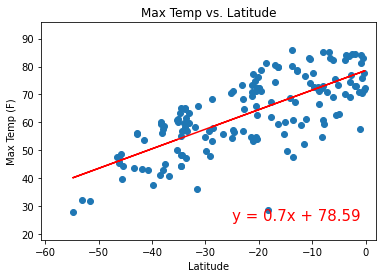

In [22]:
slat = south_hem_df["Latitude"]
smaxtemp = south_hem_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, smaxtemp)
regression_values = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(slat, smaxtemp)
plt.plot(slat ,regression_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(min(south_hem_df["Latitude"])-6, max(south_hem_df["Latitude"])+2)
plt.ylim(min(south_hem_df["Temperature"])-10, max(south_hem_df["Temperature"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/slat_temp.png")

There is a strong positive correlation between max temp and latitude in the southern hemisphere. The higher latitude a city has the higher the temp.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.12x + 72.39
The r value is: -0.1


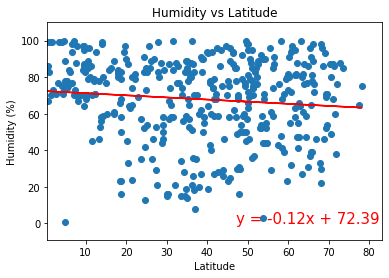

In [25]:
nlat = north_hem_df["Latitude"]
nhumidity = north_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhumidity)
regression_values = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(nlat, nhumidity)
plt.plot(nlat ,regression_values,"r-")
plt.annotate(line_eq,(47,0),fontsize=15,color="red")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(north_hem_df["Latitude"])-0, max(north_hem_df["Latitude"])+5)
plt.ylim(min(north_hem_df["Humidity"])-10, max(north_hem_df["Humidity"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/nlat_hum.png")

There is no correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.2x + 78.33
The r value is: 0.18


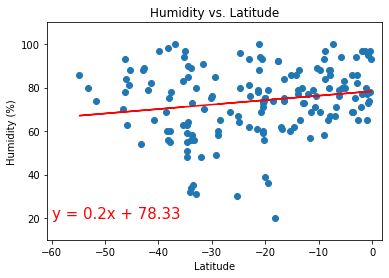

In [26]:
slat = south_hem_df["Latitude"]
shumidity = south_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shumidity)
regression_values = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(slat, shumidity)
plt.plot(slat ,regression_values,"r-")
plt.annotate(line_eq,(-60,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(south_hem_df["Latitude"])-6, max(south_hem_df["Latitude"])+2)
plt.ylim(min(south_hem_df["Humidity"])-10, max(south_hem_df["Humidity"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/slat_hum.png")

There is no correlation between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.13x + 64.75
The r value is: -0.06


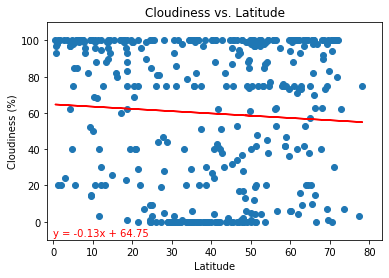

In [27]:
nlat = north_hem_df["Latitude"]
ncloud = north_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regression_values = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(nlat, ncloud)
plt.plot(nlat ,regression_values,"r-")
plt.annotate(line_eq,(0,-8),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(north_hem_df["Latitude"])-2, max(north_hem_df["Latitude"])+5)
plt.ylim(min(north_hem_df["Cloudiness"])-10, max(north_hem_df["Cloudiness"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/nlat_cloud.png")

There is no correlation between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.37x + 39.66
The r value is: -0.13


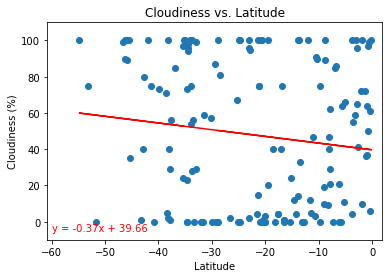

In [28]:
slat = south_hem_df["Latitude"]
scloud = south_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regression_values = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(slat, scloud)
plt.plot(slat ,regression_values,"r-")
plt.annotate(line_eq,(-60,-5),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(south_hem_df["Latitude"])-6, max(south_hem_df["Latitude"])+2)
plt.ylim(min(south_hem_df["Cloudiness"])-10, max(south_hem_df["Cloudiness"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/slat_cloud.png")

There is no correlation between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x + 6.77
The r value is: 0.15


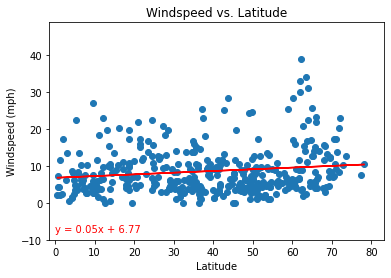

In [29]:
nlat = north_hem_df["Latitude"]
nws = north_hem_df["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nws)
regression_values = slope * nlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(nlat, nws)
plt.plot(nlat ,regression_values,"r-")
plt.annotate(line_eq,(0,-8),fontsize=10,color="red")
plt.title("Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlim(min(north_hem_df["Latitude"])-2, max(north_hem_df["Latitude"])+5)
plt.ylim(min(north_hem_df["Windspeed"])-10, max(north_hem_df["Windspeed"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/nlat_wind.png")

There is no correlation between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x + 5.97
The r value is: -0.21


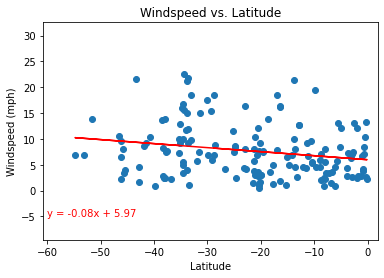

In [30]:
slat = south_hem_df["Latitude"]
sws = south_hem_df["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, sws)
regression_values = slope * slat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(slat, sws)
plt.plot(slat ,regression_values,"r-")
plt.annotate(line_eq,(-60,-5),fontsize=10,color="red")
plt.title("Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlim(min(south_hem_df["Latitude"])-6, max(south_hem_df["Latitude"])+2)
plt.ylim(min(south_hem_df["Windspeed"])-10, max(south_hem_df["Windspeed"])+10)

print(f'The r value is: {round(rvalue,2)}')

plt.savefig("../output_data/slat_wind.png")

There is a very low correlation between wind speed and latitude in the southern hemisphere.